In [61]:
import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import re
import string
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import train_test_split,GridSearchCV


#For Clasification Model Built
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [62]:
# For Algorithm

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [63]:
#Location & Keyword Extraction Module
import pandas as pd
import numpy as np

import spacy
import en_core_web_sm
from textrank4zh import TextRank4Keyword

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import re
import string
import nltk

from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

In [64]:
import nest_asyncio
nest_asyncio.apply()

import twint
import pandas
#configuration

TweetKeyword="#BananiFire"
config = twint.Config()
config.Search = TweetKeyword
config.Lang = "en"
config.Limit = 10
# config.Since = "2019–04–29"
# config.Until = "2020–04–29"
# config.Store_json = True
config.Store_csv = True
config.Output = "get_tweet_data.csv"
# running search
twint.run.Search(config)

com> 3 probe bodies fail to submit report, time extended  https://t.co/GRQUShHVKo #bananifire
1116418236042506240 2019-04-12 01:10:24 +0600 <banglatribune> এই শহর যেন মৃত্যুকূপ না হয় #bananifire @BRACworld  https://t.co/nhvFvNOmMt
1115674372818128896 2019-04-09 23:54:33 +0600 <DDulal2> May Allah place him in Jannah #firefighter #BANGLADESH #bananifire  https://t.co/Urf7h0fI61
1115610784661295104 2019-04-09 19:41:52 +0600 <banglalivenews> বনানী অগ্নিকান্ডে আহত দমকলকর্মীকে সিঙ্গাপুরে নিয়েও বাঁচানো গেলো না  https://t.co/EneuFTZCZ5 #Banani #BananiFire
1115527937535569920 2019-04-09 14:12:40 +0600 <dailystarnews> মৃত্যুবরণকারী ফায়ারম্যান সোহেল রানার পরিবারের উপযুক্ত কেউ থাকলে তাকে চাকরি দেওয়ার ব্যবস্থা করা হবে বলে জানিয়েছেন স্বরাষ্ট্রমন্ত্রী #Bangladesh #bananifire  https://t.co/vJuNV0TwW7
1115523754803769344 2019-04-09 13:56:03 +0600 <banglatribune> চোখের জলে সোহেলকে বিদায় জানালেন সহকর্মীরা #bananifire  https://t.co/YciruzAVIm
1115511228313501696 2019-04-09 13:06:16 +0600 <momtarin> 

In [65]:
# Read the dataset csv files and create pandas datframes

train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("get_tweet_data.csv", error_bad_lines=False)
print("Train and Test data sets are imported successfully")

Train and Test data sets are imported successfully


In [66]:
test_df.rename({"tweet": "text"},axis='columns',inplace =True)

## 1. Data Analysis and Exploration

### 1.1 Explore Data

In [67]:
# Define a function to explore the train and test dataframes

def explore_data(df):
    print("-"*100)
    print("Shape of dataframe: ",df.shape)
    print("Number of records in data set",df.shape[0])
    print("Information of Dataset")
    df.info()
    print("-"*100)
    print("First 5 records of dataset:")
    return df.head(10)
    print("-"*100)


In [68]:
explore_data(train_df)

----------------------------------------------------------------------------------------------------
Shape of dataframe:  (7613, 5)
Number of records in data set 7613
Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
----------------------------------------------------------------------------------------------------
First 5 records of dataset:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [69]:
explore_data(test_df)

----------------------------------------------------------------------------------------------------
Shape of dataframe:  (91, 36)
Number of records in data set 91
Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               91 non-null     int64  
 1   conversation_id  91 non-null     int64  
 2   created_at       91 non-null     object 
 3   date             91 non-null     object 
 4   time             91 non-null     object 
 5   timezone         91 non-null     int64  
 6   user_id          91 non-null     int64  
 7   username         91 non-null     object 
 8   name             91 non-null     object 
 9   place            0 non-null      float64
 10  text             91 non-null     object 
 11  language         91 non-null     object 
 12  mentions         91 non-null     object 
 13  urls           

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1226200862499885057,1226200862499885057,2020-02-08 23:47:21 Bangladesh Standard Time,2020-02-08,23:47:21,600,1069776049,banglalivenews,Bangladesh Livenews,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1174725533457899521,1174725533457899521,2019-09-19 22:42:47 Bangladesh Standard Time,2019-09-19,22:42:47,600,2510356369,banglatribune,Bangla Tribune,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1144552741273927680,1144552741273927680,2019-06-28 16:26:52 Bangladesh Standard Time,2019-06-28,16:26:52,600,2510356369,banglatribune,Bangla Tribune,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1142985300911841280,1142985300911841280,2019-06-24 08:38:26 Bangladesh Standard Time,2019-06-24,08:38:26,600,3306545726,unbnewsroom,UNB - United News of Bangladesh,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1125341237056118784,1125341237056118784,2019-05-06 16:07:13 Bangladesh Standard Time,2019-05-06,16:07:13,600,77696645,dailystarnews,The Daily Star,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5,1121946547464413186,1121946547464413186,2019-04-27 07:17:56 Bangladesh Standard Time,2019-04-27,07:17:56,600,1102172150629306368,shoheler,Shohel(Designer),NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
6,1121060425465040903,1121060425465040903,2019-04-24 20:36:48 Bangladesh Standard Time,2019-04-24,20:36:48,600,1102172150629306368,shoheler,Shohel(Designer),NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
7,1120882576451829760,1120882576451829760,2019-04-24 08:50:05 Bangladesh Standard Time,2019-04-24,08:50:05,600,1102172150629306368,shoheler,Shohel(Designer),NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8,1120579462456926208,1120579462456926208,2019-04-23 12:45:37 Bangladesh Standard Time,2019-04-23,12:45:37,600,1102172150629306368,shoheler,Shohel(Designer),NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9,1120359197881847808,1120359197881847808,2019-04-22 22:10:22 Bangladesh Standard Time,2019-04-22,22:10:22,600,1102172150629306368,shoheler,Shohel(Designer),NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


## 2. Data Pre-processing

### 2.1 Data Normalization
- Removing URL
- Removing all irrelevant characters (Numbers and Punctuation)
- Convert all characters into lowercase

In [70]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [71]:
train_df1=train_df.copy()
test_df1=test_df.copy()


train_df1['text'] = train_df1['text'].apply(lambda x: clean_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x: clean_text(x))

In [72]:
def text_after_preprocess(before_text,after_text):
    print("-"*50)
    print("Before Clean Text")
    print("-"*50)
    print(before_text.head(10))
    print("-"*50)
    print("After Clean Text")
    print("-"*50)
    print(after_text.head(10))
    

In [73]:
# text_after_preprocess(test_df['text'],test_df1['text'])
# text_after_preprocess(train_df['text'],train_df1['text'])

### 2.2 Tokenization

In [74]:
# Lets Tokenize the training and the test dataset copies with RegEx tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_df1['text'] = train_df1['text'].apply(lambda x: tokenizer.tokenize(x))
test_df1['text'] = test_df1['text'].apply(lambda x: tokenizer.tokenize(x))

In [75]:
# train_df1['text'].head(5)
# test_df1['text'].head(5)

### 2.3 Remove Stopwords

In [76]:
# Remove Stop Words Function
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [77]:
train_df1['text'] = train_df1['text'].apply(lambda x: remove_stopwords(x))
test_df1['text'] = test_df1['text'].apply(lambda x: remove_stopwords(x))

### 2.4 Convert the list of tokens into back to the string

In [78]:
def combine_text(text):
    all_text = ' '.join(text)
    return all_text

In [79]:
train_df1['text'] = train_df1['text'].apply(lambda x: combine_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x: combine_text(x))

### 2.5 Lemmatization

In [80]:
def stem_lem(text):
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemm_text =  " ".join(lemmatizer.lemmatize(token) for token in tokens)
    return lemm_text


In [81]:
train_df1['text'] = train_df1['text'].apply(lambda x: stem_lem(x))
test_df1['text'] = test_df1['text'].apply(lambda x: stem_lem(x))

## 3. Vectorization of text

In [82]:
# Vectorize the text using CountVectorizer
count_vectorizer = CountVectorizer()
train_cv = count_vectorizer.fit_transform(train_df1['text'])
test_cv = count_vectorizer.transform(test_df1["text"])


In [83]:
# Vectorize the text using TFIDF
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tf = tfidf.fit_transform(train_df1['text'])
test_tf = tfidf.transform(test_df1["text"])

### Model List For Classifire

In [84]:
#Split TFDIF vectorize data

x_train_tf,x_test_tf,y_train_tf,y_test_tf = train_test_split(train_tf,train_df.target,test_size=0.2,random_state=2020)

## 5. Best Classifire

In [85]:
# After all classifires test LogisticRegression() with TfidfVectorizer work best

clf_logreg = LogisticRegression(C=1.0,penalty = 'l2',solver='lbfgs')
clf_logreg.fit(x_train_tf, y_train_tf)
prediction = clf_logreg.predict(x_test_tf)
confusion_matrix(y_test_tf,prediction)
print(classification_report(y_test_tf,prediction))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       849
           1       0.85      0.66      0.74       674

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



## Submission File

In [86]:
def submission(file_loc,model,text_vector):
    
    sub_df = pd.read_csv(file_loc)
    sub_df['target'] = model.predict(text_vector)
    sub_df.to_csv("get_tweet_data.csv",index=False)


In [87]:
file_loc = 'get_tweet_data.csv'
test_vector = test_tf
submission(file_loc,clf_logreg,test_vector)

## Read Prediction

In [88]:
#Read CSV
df=pd.read_csv("get_tweet_data.csv")
#print(df.count())

#Remove Not Disaster Tweet
#df = df.drop(0, axis=0)



In [89]:
df_target = df[ df['target'] == 0 ] # Step 1
df = df.drop(df_target.index, axis=0) # Step 2

In [90]:
#Remove Column
df = df.drop(['target','id','conversation_id', 'created_at', 'timezone', 'user_id', 'place', 'language', 'mentions', 'urls', 'replies_count', 'retweets_count', 'likes_count', 'hashtags', 'cashtags', 'link', 'retweet', 'video', 'quote_url', 'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest'], axis = 1) 

df.rename({"tweet": "text"},axis='columns',inplace =True)

print(df.count())

date        36
time        36
username    36
name        36
text        36
photos      36
dtype: int64


## Again Clean Data

In [91]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


df['text'] = df['text'].apply(lambda x: clean_text(x))

In [92]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


df['text'] = df['text'].apply(lambda x: clean_text(x))

In [93]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x))


In [94]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [95]:
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))

In [96]:
def combine_text(text):
    all_text = ' '.join(text)
    return all_text

In [97]:
df['text'] = df['text'].apply(lambda x: combine_text(x))

In [98]:
def stem_lem(text):
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemm_text =  " ".join(lemmatizer.lemmatize(token) for token in tokens)
    return lemm_text

In [99]:
df['text'] = df['text'].apply(lambda x: stem_lem(x))

## Location Extraction

In [100]:
#Location Extraction Using SpaCy

nlp = en_core_web_sm.load()
def location(df_text):
    text = df_text
    doc = nlp(text)
    location = []
    for entity in doc.ents:
        if entity.label_ == "LOC" or entity.label_ == "GPE":
            location.append(entity.text) 
    return location

In [101]:
df['location'] = df['text'].apply(lambda x: location(x))

In [102]:
#convert location column to a list
location_list = df['location'].to_numpy()
#print(location_list)

#remove none and null value
location_list = list(filter(None, location_list))
#print(location_list)

In [103]:
#Convert all list location to a list for better calculation
list_location = []
for x in range(len(location_list)):
    list_location.extend(location_list[x])

In [104]:
#Built a temp location dataframe
temp_location_df = pd.DataFrame(columns=['location'])
temp_location_df['location'] = list_location

#check output
print(temp_location_df['location'])

0    dailystarnews
1        singapore
Name: location, dtype: object


In [105]:
#Location Count 
feat = temp_location_df['location'].value_counts()
print(feat.head(20))

dailystarnews    1
singapore        1
Name: location, dtype: int64


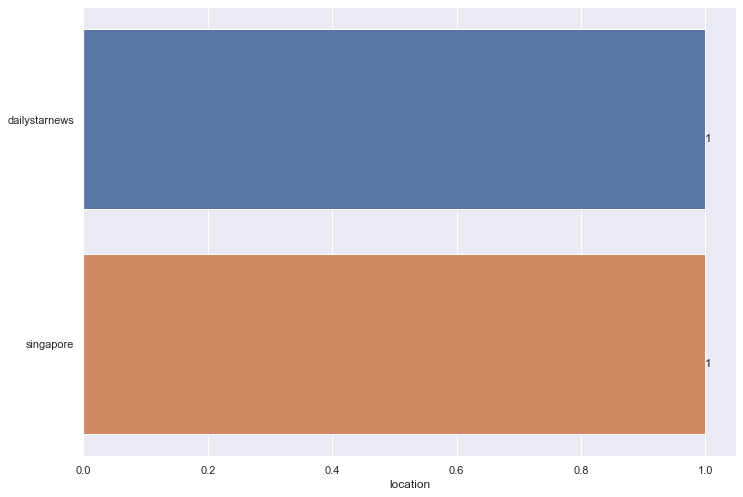

In [106]:
#Draw Bar Plot
ax = sns.barplot(y=temp_location_df['location'].value_counts()[:15].index,x=temp_location_df['location'].value_counts()[:15],orient='h')

sns.set(rc={'figure.figsize':(11.7,8.27)})
initialx=0
for p in ax.patches:
  ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
  initialx+=1

## Keyword Extraction

In [107]:
def keyword(df_text):
    text = df_text
    tr4w = TextRank4Keyword()
    keyword = []
    tr4w.analyze(text=text, lower=True, window=2)
    for item in tr4w.get_keywords(4, word_min_len=5):
        keyword.append(item.word)
    return keyword

In [108]:
df['keyword'] = df['text'].apply(lambda x: keyword(x))

In [109]:
#convert keyword column to a list
keyword_list = df['keyword'].to_numpy()
#print(keyword_list)

#remove none and null value
keyword_list = list(filter(None, keyword_list))
#print(keyword_list)

In [110]:
#Convert all list location to a list for better calculation
list_keyword = []
for x in range(len(keyword_list)):
    list_keyword.extend(keyword_list[x])

In [111]:
temp_keyword_df = pd.DataFrame(columns=['keyword'])
temp_keyword_df['keyword'] = list_keyword

In [112]:
feat =temp_keyword_df['keyword'].value_counts()
print(feat.head(5))

bananifire      19
sheikhhasina    11
detail          10
building        10
firefighter      7
Name: keyword, dtype: int64


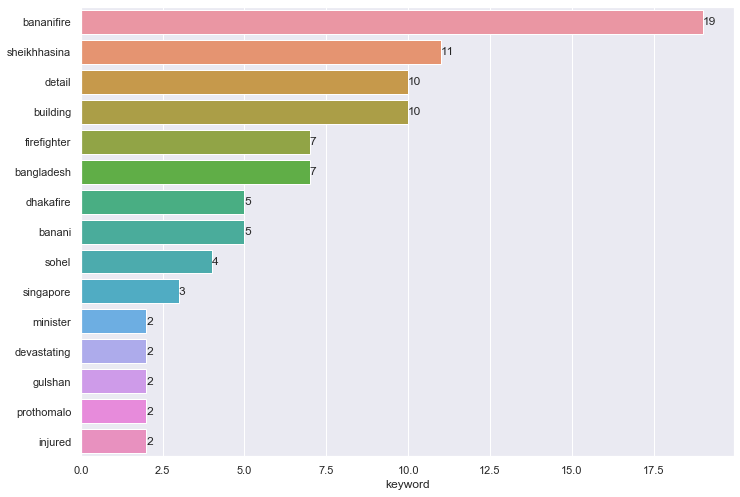

In [113]:
import matplotlib.pyplot as plt
ax = sns.barplot(y=temp_keyword_df['keyword'].value_counts()[:15].index,x=temp_keyword_df['keyword'].value_counts()[:15],orient='h')

sns.set(rc={'figure.figsize':(11.7,8.27)})
initialx=0
for p in ax.patches:
  ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
  initialx+=1


In [114]:
initialx=0
for p in ax.patches:
  ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
  initialx+=1

In [115]:
initialx=0
for p in ax.patches:
  ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
  initialx+=1

In [116]:
initialx=0
for p in ax.patches:
  ax.text(p.get_width(),initialx+p.get_height()/8,'{:1.0f}'.format(p.get_width()))
  initialx+=1

In [117]:
df.to_csv("tweet_data.csv",index=False)